# -----------------------------
# 🧱 Imports and Class Setup
# -----------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### -----------------------------
#### 📥 Load and Prepare Data
#### -----------------------------
###### ** Load Brent oil price data **

In [2]:
df = pd.read_csv("../data/BrentOilPrices.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')
df.dropna(subset=['Date'], inplace=True)  
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


# Plot Raw Price

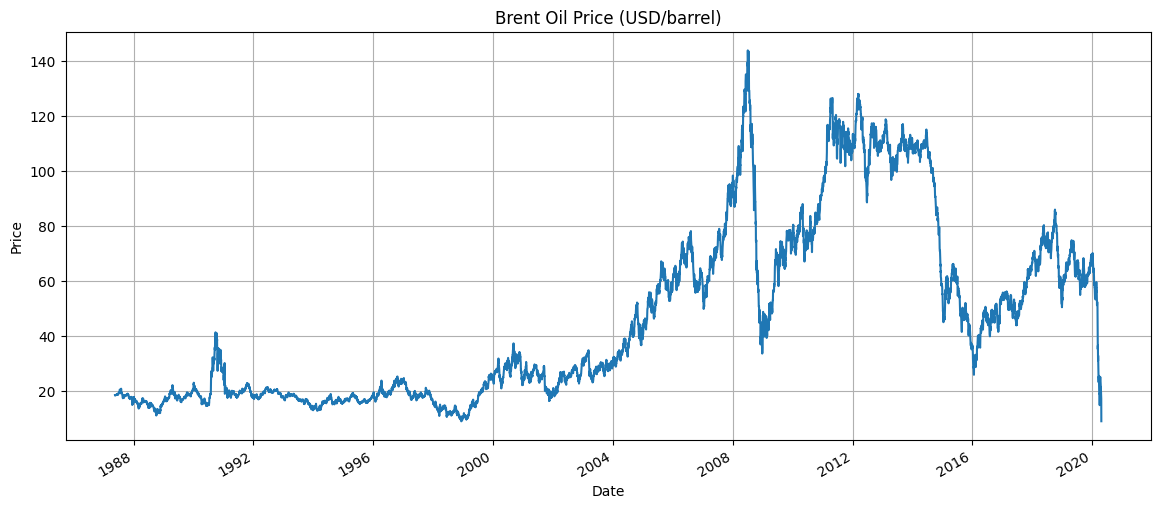

In [4]:
plt.figure(figsize=(14,6))
df['Price'].plot(title="Brent Oil Price (USD/barrel)")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Log Returns Calculation

In [5]:
df['Log_Return'] = np.log(df['Price']) - np.log(df['Price'].shift(1))
df.dropna(inplace=True)
df.head()

,Price,Log_Return
Date,,
1987-05-21,18.45,-0.009709
1987-05-22,18.55,0.005405
1987-05-25,18.60,0.002692
1987-05-26,18.63,0.001612
1987-05-27,18.60,-0.001612


# Plot Log Returns

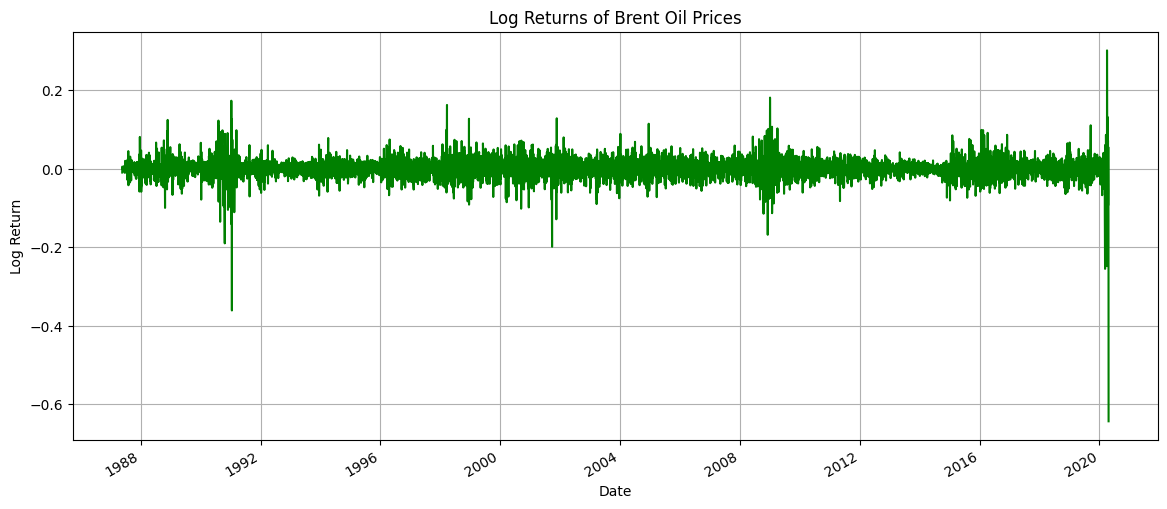

In [6]:
plt.figure(figsize=(14,6))
df['Log_Return'].plot(title="Log Returns of Brent Oil Prices", color='green')
plt.ylabel("Log Return")
plt.grid(True)
plt.show()

# Volatility Over Time

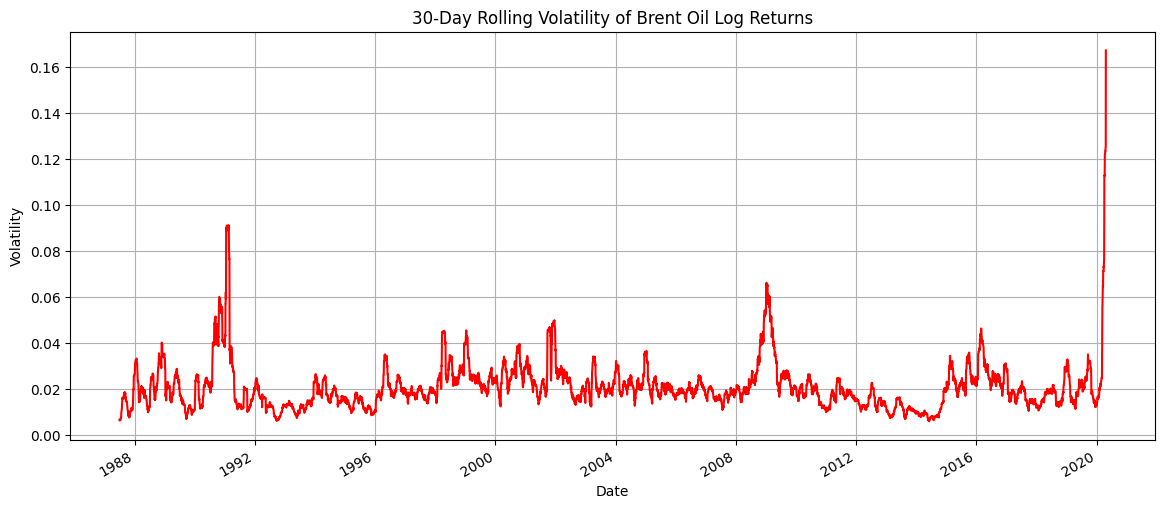

In [7]:
window = 30
df['Volatility'] = df['Log_Return'].rolling(window).std()

plt.figure(figsize=(14,6))
df['Volatility'].plot(title=f"{window}-Day Rolling Volatility of Brent Oil Log Returns", color='red')
plt.ylabel("Volatility")
plt.grid(True)
plt.show()